In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\final\estimation1.csv")
data.head()

,age,diseases,sex,bmi,children,smoker,region,charges,previous year charge
0,19,Cancer,female,27.900,0,yes,southwest,16884.92400,13667.670
1,18,Asthma,male,33.770,1,no,southeast,1725.55230,600.670
2,28,Covid,male,33.000,3,no,southeast,4449.46200,2500.456
3,33,Hypertension,male,22.705,0,no,northwest,21984.47061,18675.670
4,32,Headache,male,28.880,0,no,northwest,3866.85520,2345.786


In [3]:
data.tail()

,age,diseases,sex,bmi,children,smoker,region,charges,previous year charge
2709,42,Cancer,female,40.370,2,yes,southeast,43896.37630,8101.7980
2710,31,Asthma,male,25.935,1,no,northwest,4239.89265,5059.1730
2711,61,Covid,male,33.535,0,no,northeast,13143.33665,633.9618
2712,42,Hypertension,female,32.870,0,no,northeast,7050.02130,26607.5277
2713,51,Headache,male,30.030,1,no,southeast,9377.90470,2913.5690


In [4]:
data.shape

(2714, 9)

In [5]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 2714
Number of Columns 9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2714 entries, 0 to 2713
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   2714 non-null   int64  
 1   diseases              2714 non-null   object 
 2   sex                   2714 non-null   object 
 3   bmi                   2714 non-null   float64
 4   children              2714 non-null   int64  
 5   smoker                2714 non-null   object 
 6   region                2714 non-null   object 
 7   charges               2714 non-null   float64
 8   previous year charge  2714 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 191.0+ KB


In [7]:
data.isnull()

,age,diseases,sex,bmi,children,smoker,region,charges,previous year charge
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2709,False,False,False,False,False,False,False,False,False
2710,False,False,False,False,False,False,False,False,False
2711,False,False,False,False,False,False,False,False,False
2712,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

age                     0
diseases                0
sex                     0
bmi                     0
children                0
smoker                  0
region                  0
charges                 0
previous year charge    0
dtype: int64

In [9]:
data.describe(include='all')

,age,diseases,sex,bmi,children,smoker,region,charges,previous year charge
count,2714.000000,2714,2714,2714.000000,2714.000000,2714,2714,2714.000000,2714.000000
unique,NaN,5,2,NaN,NaN,2,4,NaN,NaN
top,NaN,Cancer,male,NaN,NaN,no,southeast,NaN,NaN
freq,NaN,664,1377,NaN,NaN,2159,745,NaN,NaN
mean,39.163596,NaN,NaN,30.677384,1.098010,NaN,NaN,13273.006729,12428.807864
std,14.051527,NaN,NaN,6.112828,1.209973,NaN,NaN,12141.188310,12547.094430
min,18.000000,NaN,NaN,15.960000,0.000000,NaN,NaN,1121.873900,20.177000
25%,26.000000,NaN,NaN,26.220000,0.000000,NaN,NaN,4719.577175,4680.110125
50%,39.000000,NaN,NaN,30.400000,1.000000,NaN,NaN,9333.014350,11561.237650
75%,51.000000,NaN,NaN,34.752500,2.000000,NaN,NaN,16586.497710,13929.341023


In [10]:
data.head()

,age,diseases,sex,bmi,children,smoker,region,charges,previous year charge
0,19,Cancer,female,27.900,0,yes,southwest,16884.92400,13667.670
1,18,Asthma,male,33.770,1,no,southeast,1725.55230,600.670
2,28,Covid,male,33.000,3,no,southeast,4449.46200,2500.456
3,33,Hypertension,male,22.705,0,no,northwest,21984.47061,18675.670
4,32,Headache,male,28.880,0,no,northwest,3866.85520,2345.786


In [11]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [12]:
data["sex"] = data["sex"].map({"female": 1, "male": 0})
data.head()

,age,diseases,sex,bmi,children,smoker,region,charges,previous year charge
0,19,Cancer,1,27.900,0,yes,southwest,16884.92400,13667.670
1,18,Asthma,0,33.770,1,no,southeast,1725.55230,600.670
2,28,Covid,0,33.000,3,no,southeast,4449.46200,2500.456
3,33,Hypertension,0,22.705,0,no,northwest,21984.47061,18675.670
4,32,Headache,0,28.880,0,no,northwest,3866.85520,2345.786


In [13]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [14]:
data["smoker"] = data["smoker"].map({"yes":0, "no":1})

In [15]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
data["region"] = data["region"].map({"southwest":0, "southeast":1, "northwest":2, "northeast":3})
data["diseases"] = data["diseases"].map({"Cancer":0, "Asthma":1, "Covid":2, "Hypertension":3, "Headache":4})

In [17]:
data.head()

,age,diseases,sex,bmi,children,smoker,region,charges,previous year charge
0,19,0,1,27.900,0,0,0,16884.92400,13667.670
1,18,1,0,33.770,1,1,1,1725.55230,600.670
2,28,2,0,33.000,3,1,1,4449.46200,2500.456
3,33,3,0,22.705,0,1,2,21984.47061,18675.670
4,32,4,0,28.880,0,1,2,3866.85520,2345.786


In [18]:
data.columns

Index(['age', 'diseases', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges', 'previous year charge'],
      dtype='object')

In [19]:
X = data.drop(["charges"], axis=1)

In [20]:
y = data["charges"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(2714, 8) (2171, 8) (543, 8)


In [23]:
X_train

,age,diseases,sex,bmi,children,smoker,region,previous year charge
445,45,3,1,33.100,0,1,0,13825.09780
990,26,4,1,19.800,1,1,0,13954.58510
2518,57,1,0,40.280,0,1,3,17963.17192
1398,23,2,0,34.400,0,1,0,826.84300
891,36,1,1,29.040,4,1,1,13931.06356
...,...,...,...,...,...,...,...,...
1638,54,2,0,34.210,2,0,1,3260.74400
1095,18,3,1,31.350,4,1,3,3561.18850
1130,39,4,1,23.870,5,1,1,7582.30230
1294,58,3,0,25.175,0,1,3,1931.12525


In [24]:
y_train

445      7345.08400
990      3378.91000
2518    20709.02034
1398     1826.84300
891      7243.81360
           ...     
1638    44260.74990
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
Name: charges, Length: 2171, dtype: float64

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [27]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [29]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)

df1 = pd.DataFrame({"Actual":y_test, "lr":y_pred1, "svm":y_pred2, "rf":y_pred3, "gbr":y_pred4})

In [30]:
df1

,Actual,lr,svm,rf,gbr
506,2643.26850,5134.893985,9565.318601,11022.316187,4813.344562
2014,11365.95200,13945.719267,9453.073847,11498.302075,11280.649165
1907,3994.17780,9199.129376,9261.924328,4044.179812,3131.084715
930,2927.06470,10920.482468,9568.486583,3674.497736,5509.467037
2677,34828.65400,31333.541317,9729.243869,39967.076826,35254.289245
...,...,...,...,...,...
900,8688.85885,8632.379853,9568.264598,12963.838694,10068.994029
2223,11657.71890,11690.924927,9459.262433,11536.427545,11720.231000
2377,7144.86265,8125.952880,9328.356031,7246.944872,7377.806312
1720,19144.57652,11879.374077,9532.867246,12161.185379,10750.176997


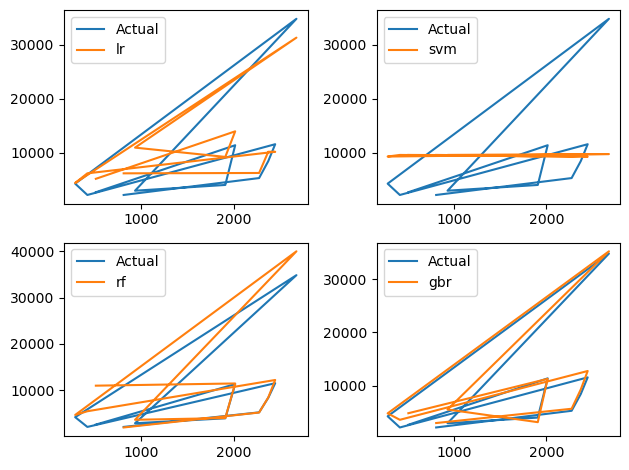

In [31]:
plt.subplot(2,2,1)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["lr"].iloc[0:11], label="lr")
plt.legend()

plt.subplot(2,2,2)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["svm"].iloc[0:11], label="svm")
plt.legend()

plt.subplot(2,2,3)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["rf"].iloc[0:11], label="rf")
plt.legend()

plt.subplot(2,2,4)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["gbr"].iloc[0:11], label="gbr")
plt.legend()

plt.tight_layout()

In [32]:
rs1 = metrics.r2_score(y_test, y_pred1)
rs2 = metrics.r2_score(y_test, y_pred2)
rs3 = metrics.r2_score(y_test, y_pred3)
rs4 = metrics.r2_score(y_test, y_pred4)

In [33]:
print(rs1*100, rs2*100, rs3*100, rs4*100)

80.20224649051497 -6.011715634627768 91.1905998698885 91.52085062312639


In [34]:
mae1 = metrics.mean_absolute_error(y_test, y_pred1)
mae2 = metrics.mean_absolute_error(y_test, y_pred2)
mae3 = metrics.mean_absolute_error(y_test, y_pred3)
mae4 = metrics.mean_absolute_error(y_test, y_pred4)

In [35]:
print(mae1, mae2, mae3, mae4)

3733.127235221295 8152.251101792395 1580.0656512773671 1774.4756869019473


In [36]:
data = {"age":35,"diseases":0,"sex":1, "bmi":40.50, "children":4, "smoker":1, "region":2, "previous year charge":13930.11319}
df = pd.DataFrame(data, index=[0])
df

,age,diseases,sex,bmi,children,smoker,region,previous year charge
0,35,0,1,40.5,4,1,2,13930.11319


In [37]:
new_pred = gbr.predict(df)
print(new_pred)

[9054.5629781]


In [38]:
gbr = GradientBoostingRegressor()
gbr.fit(X,y)

GradientBoostingRegressor()

In [39]:
import joblib

In [40]:
joblib.dump(gbr, "med_insurance_cost_pred_model_gbr")

['med_insurance_cost_pred_model_gbr']

In [41]:
model = joblib.load("med_insurance_cost_pred_model_gbr")

In [42]:
model.predict(df)

array([8892.17966128])

In [43]:
from tkinter import *

In [44]:
import joblib

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())

    model = joblib.load("med_insurance_cost_pred_model_gbr")
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])

    Label(master,text="Insurance Cost").grid(row=9)
    Label(master,text=result).grid(row=10)
    
master =Tk()
master.title("Insurance Cost Prediction")
label=Label(master,text="Insurance Cost Prediction",bg="black",fg="white").grid(row=0,columnspan=2)
Label(master,text="Enter your Age").grid(row=1)
Label(master,text="Diseases:[Cancer=0,Asthma=1,Covid=2,Hypertension=3,Headache=4]").grid(row=2)
Label(master,text="Male or Female [1/0]").grid(row=3)
Label(master,text="Enter your BMI Value").grid(row=4)
Label(master,text="Enter Number of Children").grid(row=5)
Label(master,text="Smoker Yes/No [yes=1/no=0]").grid(row=6)
Label(master,text="Region [0-3]").grid(row=7)
Label(master,text="Previous year charge").grid(row=8)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)

Button(master,text="Predict",command=show_entry).grid()
mainloop()